In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

datasets_to_combine = []

# Chargement et Préparation de la Dataset 1 (ventes_appartements_tunis/Tayara) 
print("Chargement de la Dataset 1")
try:
    data_1 = pd.read_csv(r"C:\Users\fatim\Downloads\ventes_appartements_tunis.csv.csv", encoding='utf-8')
    print("Dataset 1 Chargée avec succès.")

    # Renommage des colonnes
    data_1.rename(columns={'price': 'Prix',
                            'surface': 'Superficie',
                            'transaction': 'Transaction_Type',
                            'city': 'Quartier',
                            'region': 'Ville_Region',
                            'rooms': 'Nb_Pieces'}, inplace=True)
    datasets_to_combine.append(data_1)
    
except Exception as e:
    print(f"ERREUR LORS DU CHARGEMENT DE Dataset 1 : {e}")

#Chargement et Préparation de la Dataset 2 (MENZILI) 
print("\n Chargement de la Dataset 2 (MENZILI.xlsx)")
try:
    data_2 = pd.read_excel(r"C:\Users\fatim\Downloads\MENZILI.xlsx")
    print("Dataset 2 Chargée avec succès.")

    # Renommage des colonnes 
    data_2.rename(columns={'prix': 'Prix',
                            'Superficie': 'Superficie',
                            'Zone': 'Quartier',
                            'nbre_pieces': 'Nb_Pieces',
                            'Etage': 'Etage'}, inplace=True) 
                            
    # La Dataset MENZILI ne contient pas la colonne Transaction_Type. 
    data_2['Transaction_Type'] = 'Vente'
    data_2['Ville_Region'] = np.nan
    datasets_to_combine.append(data_2)

except FileNotFoundError:
    print("ERREUR : Le fichier MENZILI.xlsx n'a pas été trouvé. ")
except Exception as e:
    print(f"ERREUR LORS DU CHARGEMENT DE MENZILI.xlsx : {e}.")

#Chargement et Préparation de la Dataset 3 (data_prices_cleaned) 
print("\n Chargement de la Dataset 3 (data_prices_cleaned.csv)")
try:
    chemin_fichier_3 = r"C:\Users\fatim\Downloads\data_prices_cleaned.csv"
    data_3 = pd.read_csv(chemin_fichier_3, encoding='utf-8') 
    print("Dataset 3 Chargée avec succès.")

    # Renommage des colonnes (DATASET 3)
    data_3.rename(columns={'price': 'Prix', 
                            'superficie': 'Superficie', 
                            'transaction': 'Transaction_Type',
                            'city': 'Quartier', 
                            'state': 'Ville_Region',
                            'chambres': 'Nb_Pieces'}, inplace=True) 
    
    datasets_to_combine.append(data_3)

except FileNotFoundError:
    print(f"!!! ERREUR : Le fichier data_prices_cleaned.csv n'a pas été trouvé. !!!")
except Exception as e:
    print(f"!!! ERREUR LORS DU CHARGEMENT DE  : {e}. !!!")

# Concaténation Finale des Datasets 
print(f"\n--- 4. Concaténation des {len(datasets_to_combine)} Datasets ---")

if datasets_to_combine:
    colonnes_base = ['Prix', 'Superficie', 'Transaction_Type', 'Quartier', 'Ville_Region', 'Nb_Pieces']
    
    # Assurer que toutes les datasets ont les colonnes nécessaires 
    data_combinée = pd.concat([df[[col for col in colonnes_base if col in df.columns]] 
                               for df in datasets_to_combine], ignore_index=True)

    print(f"Concaténation Réussie.")
    
    # Nettoyage de la colonne Transaction_Type (étape recommandée pour uniformiser Vente/Location)
    data_combinée['Transaction_Type'] = data_combinée['Transaction_Type'].astype(str).str.lower()
    data_combinée['Transaction_Type'] = data_combinée['Transaction_Type'].replace({
        'vente': 'Vente',
        'sale': 'Vente',
        'location': 'Location',
        'rent': 'Location',
    })

else:
    print("Aucune Dataset n'a été chargée avec succès. La Dataset finale est vide.")
    data_combinée = pd.DataFrame() 

data = data_combinée
#Vérification Finale de la Dataset Combinée (data) 
print("\n Dataset Finale (Combinée)")
print(f"Taille finale de la Dataset : {data.shape}")
print(f"Nombre total de lignes chargées : {len(data)}")
print("\nPremières lignes de la Dataset Finale :")
print(data.head())

Chargement de la Dataset 1
Dataset 1 Chargée avec succès.

 Chargement de la Dataset 2 (MENZILI.xlsx)
Dataset 2 Chargée avec succès.

 Chargement de la Dataset 3 (data_prices_cleaned.csv)
Dataset 3 Chargée avec succès.

--- 4. Concaténation des 3 Datasets ---
Concaténation Réussie.

 Dataset Finale (Combinée)
Taille finale de la Dataset : (18647, 6)
Nombre total de lignes chargées : 18647

Premières lignes de la Dataset Finale :
           Prix Superficie Transaction_Type Quartier Ville_Region Nb_Pieces
0  6.000000e+02       3000         Location   Nabeul      Takelsa         3
1  1.020000e+09        270            Vente   Ariana    La_Soukra         3
2  4.900000e+05        141            Vente   Ariana   Chotrana_1         3
3  1.320000e+05         40            Vente   Ariana    La_Soukra         1
4  3.800000e+05        100            Vente   Ariana   Chotrana_1         2


In [15]:
#NORMALISATION DES COLONNES
#Standardiser les noms de colonnes en minuscules
data.columns = data.columns.str.lower().str.strip()

# Si une colonne manque → on la crée vide
colonnes = ['nb_pieces','title','description','transaction_type','ville_region','quartier']
for col in colonnes:
    if col not in data.columns:
        data[col] = ''
    data[col] = data[col].astype(str).str.lower().str.strip()

#FILTRAGE SUR 'VENTE'
data_filtered_step1 = data[data['transaction_type'] == 'vente'].copy()
print(f"Étape 1 : Vente → {len(data_filtered_step1)} annonces")

#FILTRAGE SUR GRAND TUNIS
villes_grand_tunis = [
    'tunis', 'lafayette', 'mutuelleville', 'montplaisir', 'centre urbain nord',
    'el menzah', 'el menzah 1', 'el menzah 5', 'el menzah 6', 'ennasr', 
    'el omrane', 'el omrane supérieur', 'el ouardia', 'el khadra', 
    'bab souika', 'bab bhar', 'la kasbah', 'la medina',
    'sijoumi', 'séjoumi', 'cité olympique', 'cité jardins',
    'mutuelle ville', 'bardo', 'le bardo',
    'ariana', 'ariana ville', 'ariana superieur', 'ghazela', 'cite ghazela',
    'raoued', 'raoued plage', 'borj louzir', 'la soukra', 'sokra',
    'chotrana 1', 'chotrana 2', 'chotrana 3', 'ennkhilet',
    'la marsa', 'marsa', 'sidi daoud', 'gammarth', 'gammarth supérieur',
    'gammarth village', 'cité des pins', 'sidi bou said',
    'carthage', 'carthage byrsa', 'carthage salambo',
    'le kram', 'krame', 'lac 1', 'lac 2', 'les berges du lac',
    'jardins de carthage',
    'ben arous', 'mourouj 1','mourouj 2','mourouj 3','mourouj 4','mourouj 5','mourouj 6',
    'megrine', 'megrine jawhara', 'megrine chaker', 
    'rades', 'rades plage', 'ezzahra', 'boumhel', 'fouchana', 
    'hammam lif', 'hammam chatt', 'medina el jadida',
    'manouba', 'oued ellil', 'den den', 'mornaguia',
    'douar hicher', 'el batan', 'jedaida', 'borj el amri'
]

data_filtered_step2 = data_filtered_step1[
    data_filtered_step1['ville_region'].isin(villes_grand_tunis) |
    data_filtered_step1['quartier'].isin(villes_grand_tunis)
].copy()

print(f"Étape 2 : Grand Tunis → {len(data_filtered_step2)} annonces")

#FILTRAGE APPARTEMENTS / STUDIOS / S+1 → S+9
type_propriete_pattern = r'appartement|studio|s\+[1-9]'

filtre_type = (
    data_filtered_step2['title'].str.contains(type_propriete_pattern, na=False) |
    data_filtered_step2['description'].str.contains(type_propriete_pattern, na=False) |
    data_filtered_step2['nb_pieces'].str.contains(r'^[1-9]$', na=False)
)

data_final = data_filtered_step2[filtre_type].copy()
data_final.reset_index(drop=True, inplace=True)
print(f"Étape 3 : Appartements S+1 → S+9 → {len(data_final)} annonces")

# DF MODELE
colonnes_cles = ['prix','superficie','nb_pieces','transaction_type','ville_region','quartier']
df_modele = data_final[colonnes_cles].copy()
print(f"df_modele créé → {len(df_modele)} observations")

# NETTOYAGE QUARTIER
# convertir en string pour éviter les erreurs
df_modele['quartier'] = df_modele['quartier'].astype(str).str.strip().str.lower()

# supprimer tout ce qui est vide, 'nan', 'none', ou NaN
df_modele = df_modele[
    (df_modele['quartier'] != '') &
    (df_modele['quartier'] != 'nan') &
    (df_modele['quartier'] != 'none')
].copy()

# supprimer les NaN réels
df_modele.dropna(subset=['quartier'], inplace=True)

print(f"Après nettoyage Quartier → {len(df_modele)} obs")

# NETTOYAGE NB_PIECES
df_modele['nb_pieces'] = df_modele['nb_pieces'].str.extract(r'([1-9])', expand=False)
df_modele['nb_pieces'] = pd.to_numeric(df_modele['nb_pieces'], errors='coerce')

# NETTOYAGE PRIX & SUPERFICIE
for col in ['prix', 'superficie']:

    #Convertir en string 
    df_modele[col] = df_modele[col].astype(str)

    df_modele[col] = df_modele[col].str.replace(',', '.', regex=False)
    df_modele[col] = df_modele[col].str.replace(r'[^\d\.]', '', regex=True)

    # Convertir en numérique
    df_modele[col] = pd.to_numeric(df_modele[col], errors='coerce')

# Supprimer lignes invalides
df_modele.dropna(subset=['prix', 'superficie'], inplace=True)

print(f"Final → {len(df_modele)} observations propres")

Étape 1 : Vente → 8347 annonces
Étape 2 : Grand Tunis → 3643 annonces
Étape 3 : Appartements S+1 → S+9 → 3068 annonces
df_modele créé → 3068 observations
Après nettoyage Quartier → 3068 obs
Final → 3049 observations propres


In [16]:
#Définir les noms de colonnes ---
COLONNE_PRIX = 'prix'
COLONNE_SUPERFICIE = 'superficie' 

# Configuration des seuils métiers pour le Grand Tunis
PRIX_MIN = 30000      
PRIX_MAX = 1000000    
SURFACE_MIN = 20      
SURFACE_MAX = 500     

print("\nNettoyage Avancé des Valeurs Extrêmes")

# Nettoyage Métier (Logique immobilière)
df_clean = df_modele[
    (df_modele[COLONNE_PRIX] >= PRIX_MIN) & (df_modele[COLONNE_PRIX] <= PRIX_MAX) &
    (df_modele[COLONNE_SUPERFICIE] >= SURFACE_MIN) & (df_modele[COLONNE_SUPERFICIE] <= SURFACE_MAX)
].copy()

print(f"Après filtrage métier : {len(df_clean)} observations restantes.")

#Nettoyage Statistique (IQR optimisé)
COEFF_IQR = 1.5 

for col in [COLONNE_PRIX, COLONNE_SUPERFICIE]:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lim_inf = Q1 - COEFF_IQR * IQR
    lim_sup = Q3 + COEFF_IQR * IQR
    
    # On applique le filtre IQR
    avant = len(df_clean)
    df_clean = df_clean[(df_clean[col] >= lim_inf) & (df_clean[col] <= lim_sup)].copy()
    print(f"Colonne '{col}' : {avant - len(df_clean)} outliers supprimés.")

# Mise à jour de la dataframe principale
df_modele = df_clean
print(f"✅ Nettoyage terminé. Total final : {len(df_modele)} lignes.")


Nettoyage Avancé des Valeurs Extrêmes
Après filtrage métier : 2188 observations restantes.
Colonne 'prix' : 48 outliers supprimés.
Colonne 'superficie' : 166 outliers supprimés.
✅ Nettoyage terminé. Total final : 1974 lignes.


In [17]:
import os
output_file = 'datasettraite.xlsx'
df_modele.to_excel(output_file, index=False)
print("\nexportation reussite.")
print(f"dataset nettoye sauvegarde sous : {output_file}")
print(f"chemin complet du fichier : {os.path.abspath(output_file)}")
print(f"nombre d'observations finales : {len(df_modele)}")



exportation reussite.
dataset nettoye sauvegarde sous : datasettraite.xlsx
chemin complet du fichier : C:\Users\fatim\datasettraite.xlsx
nombre d'observations finales : 1974


In [18]:
df = pd.read_excel("datasettraite.xlsx")

# Affiche les 10 premières lignes
print(df.head())

# Affiche les noms des colonnes
print(df.columns)


     prix  superficie  nb_pieces transaction_type ville_region quartier
0  490000       141.0          3            vente   chotrana_1   ariana
1  132000        40.0          1            vente    la_soukra   ariana
2  380000       100.0          2            vente   chotrana_1   ariana
3  500002       191.0          2            vente     la_marsa    tunis
4  810000       260.0          4            vente     gammarth    tunis
Index(['prix', 'superficie', 'nb_pieces', 'transaction_type', 'ville_region',
       'quartier'],
      dtype='object')


C:\Users\fatim\AppData\Local\Temp\ipykernel_11480\3653691098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


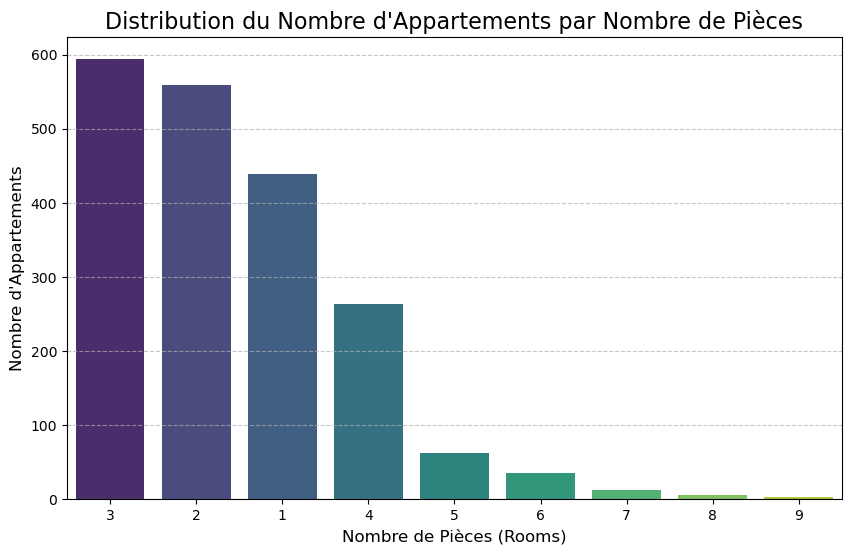

In [19]:
COLONNE_NB_PIECES = 'nb_pieces' 

plt.figure(figsize=(10, 6))

sns.countplot(
    x=COLONNE_NB_PIECES,
    data=df_modele,
    palette='viridis',
    order=df_modele[COLONNE_NB_PIECES].value_counts().index
)

plt.title("Distribution du Nombre d'Appartements par Nombre de Pièces", fontsize=16)
plt.xlabel("Nombre de Pièces (Rooms)", fontsize=12)
plt.ylabel("Nombre d'Appartements", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I. Relation Prix vs. Nombre de Pièces (1 à 9)


<Figure size 1000x600 with 0 Axes>

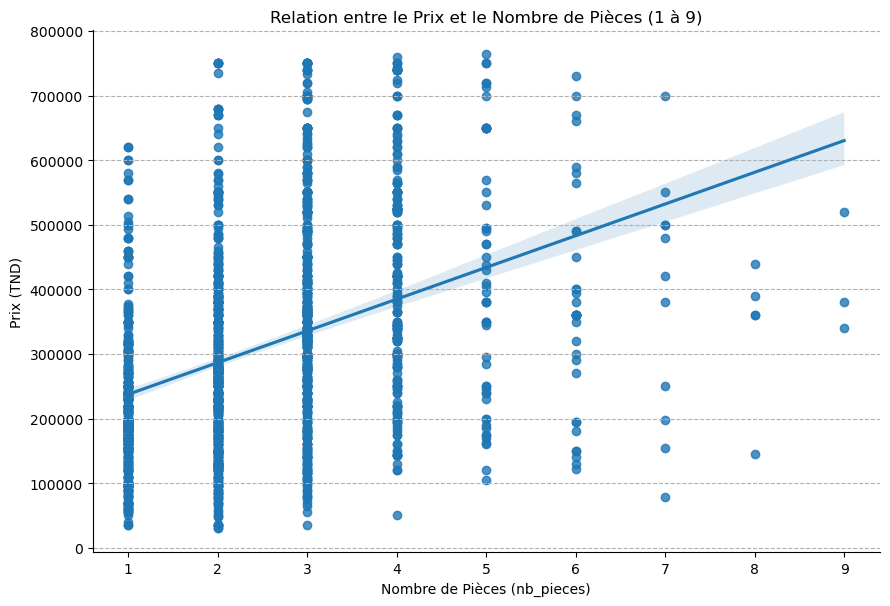

Analyse 1 : prix vs. nb_pieces - Visualisation effectuée sur 1879 observations.


In [14]:
# Définition des noms de colonnes
COLONNE_NB_PIECES = 'nb_pieces'
COLONNE_PRIX_BRUT = 'prix'
# ----------------------------------------------------------------

print(f"I. Relation Prix vs. Nombre de Pièces (1 à 9)")

# Filtrage pour s'assurer que le nombre de pièces est entre 1 et 9 inclus
df_pieces = df_modele[df_modele[COLONNE_NB_PIECES].between(1, 9)].copy()

plt.figure(figsize=(10, 6)) 

# Utilisation de lmplot pour visualiser la relation linéaire et l'ajustement
sns.lmplot(
    x=COLONNE_NB_PIECES, 
    y=COLONNE_PRIX_BRUT,
    data=df_pieces, 
    palette='viridis',
    height=6,
    aspect=1.5
)

plt.title('Relation entre le Prix et le Nombre de Pièces (1 à 9)')
plt.xlabel(f'Nombre de Pièces ({COLONNE_NB_PIECES})')
plt.ylabel(f'Prix (TND)')
plt.grid(axis='y', linestyle='--')
plt.show()

print(f"Analyse 1 : {COLONNE_PRIX_BRUT} vs. {COLONNE_NB_PIECES} - Visualisation effectuée sur {len(df_pieces)} observations.")

Aperçu des 5 premières lignes du dataset :


,prix,superficie,nb_pieces,transaction_type,ville_region,quartier
0,490000,141.0,3,vente,chotrana_1,ariana
1,132000,40.0,1,vente,la_soukra,ariana
2,380000,100.0,2,vente,chotrana_1,ariana
3,500002,191.0,2,vente,la_marsa,tunis
4,810000,260.0,4,vente,gammarth,tunis



Colonnes existantes (pour vérification) :
['prix', 'superficie', 'nb_pieces', 'transaction_type', 'ville_region', 'quartier']

Colonnes retenues après filtrage : ['prix', 'superficie', 'nb_pieces', 'ville_region']

Transformation logarithmique appliquée sur la colonne 'prix'.
Encodage One-Hot appliqué à la colonne 'ville_region'.

Colonnes numériques retenues pour la corrélation :
['prix', 'superficie', 'nb_pieces', 'Prix_Log']


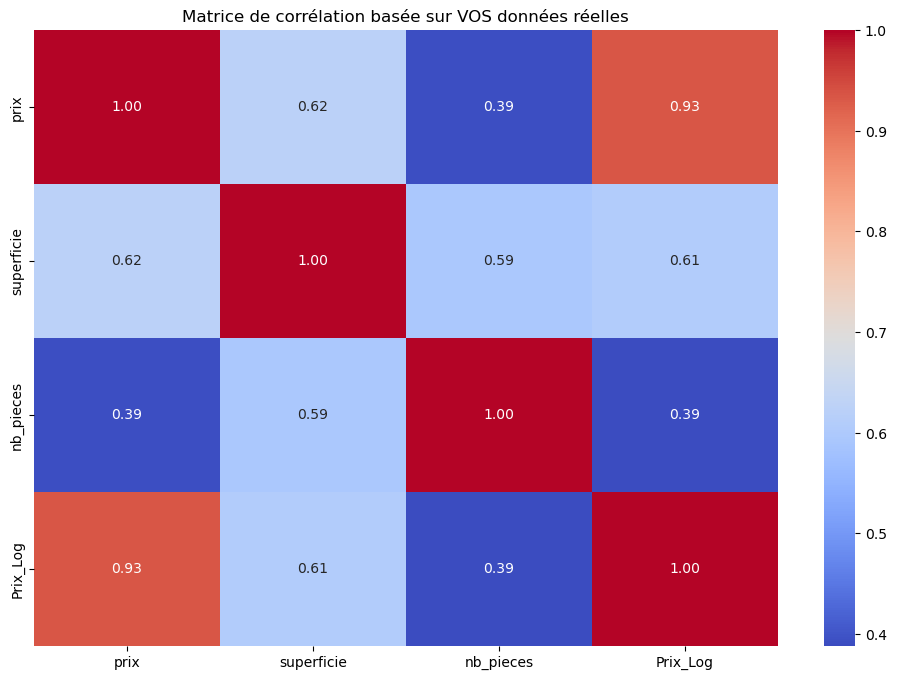

In [21]:
df = pd.read_excel('datasettraite.xlsx')

print("Aperçu des 5 premières lignes du dataset :")
display(df.head())

print("\nColonnes existantes (pour vérification) :")
print(df.columns.tolist())

COLONNE_PRIX = 'prix'
COLONNE_SUPERFICIE = 'superficie'
COLONNE_NB_PIECES = 'nb_pieces'
COLONNE_VILLE_REGION = 'ville_region'
colonnes_possibles = [COLONNE_PRIX, COLONNE_SUPERFICIE, COLONNE_NB_PIECES, COLONNE_VILLE_REGION]
colonnes_finales = [c for c in colonnes_possibles if c in df.columns]

if COLONNE_PRIX not in colonnes_finales:
    print(f"\nERREUR: La colonne de prix '{COLONNE_PRIX}' est ABSENTE du fichier ou le nom est incorrect. Veuillez ajuster la variable COLONNE_PRIX.")
    exit()

df = df[colonnes_finales].copy()
print(f"\nColonnes retenues après filtrage : {df.columns.tolist()}")

#Transformer le Prix en Log
df['Prix_Log'] = np.log1p(df[COLONNE_PRIX])
print(f"\nTransformation logarithmique appliquée sur la colonne '{COLONNE_PRIX}'.")

#Encoder Ville_Region si elle existe

if COLONNE_VILLE_REGION in df.columns:
    df = pd.get_dummies(df, columns=[COLONNE_VILLE_REGION], drop_first=True, prefix=COLONNE_VILLE_REGION)
    print(f"Encodage One-Hot appliqué à la colonne '{COLONNE_VILLE_REGION}'.")
else:
    print(f"La colonne '{COLONNE_VILLE_REGION}' n'est pas présente, encodage ignoré.")

#Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])
print("\nColonnes numériques retenues pour la corrélation :")
print(list(df_numeric.columns))

#matrice de corrélation
if len(df_numeric.columns) < 2:
    print("\nATTENTION : Moins de 2 colonnes numériques. La matrice de corrélation ne peut pas être calculée.")
else:
    corr = df_numeric.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Matrice de corrélation basée sur VOS données réelles")
    plt.show()

C:\Users\fatim\AppData\Local\Temp\ipykernel_11480\1294470317.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


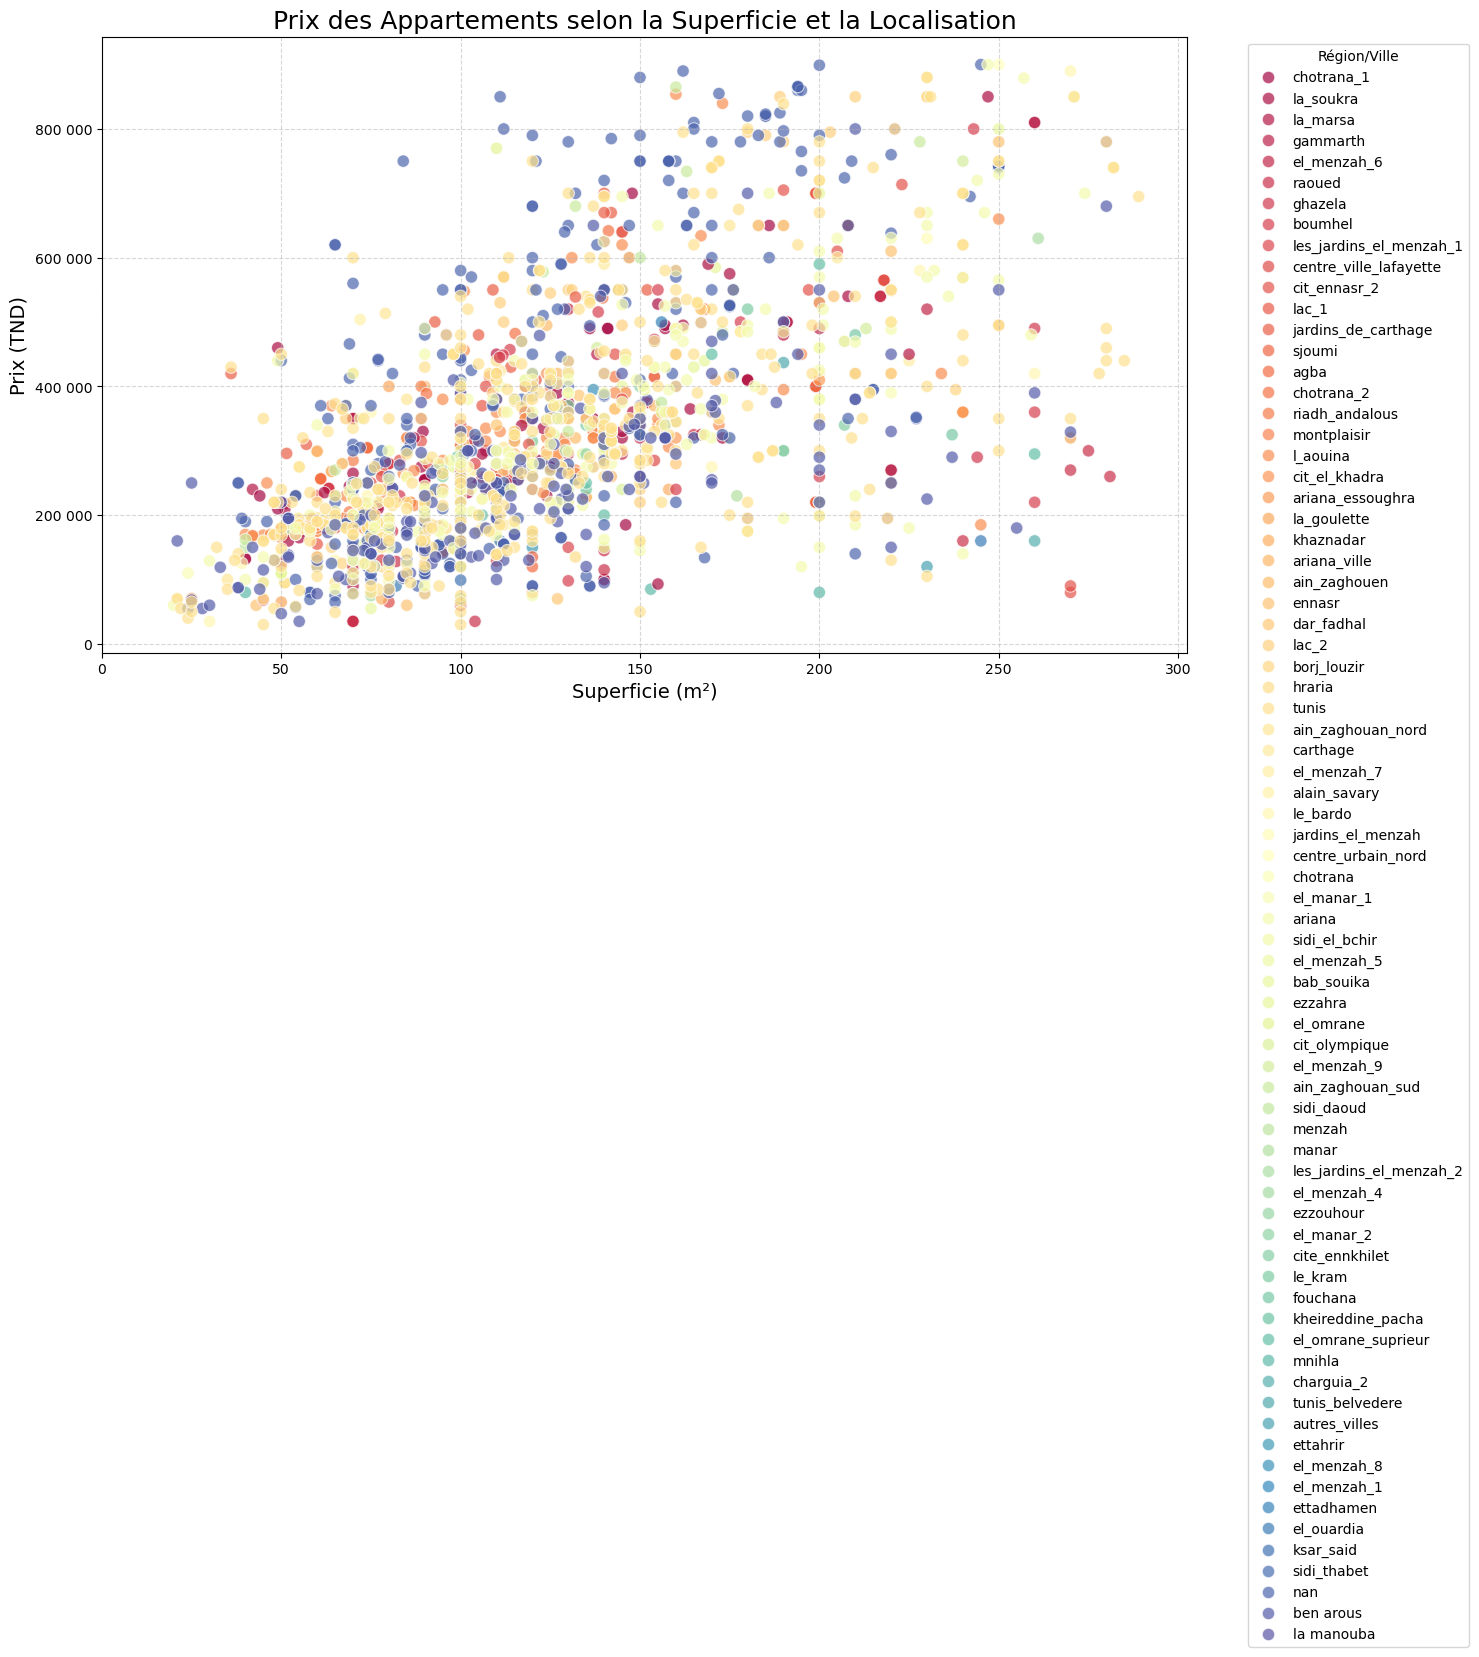

In [24]:
#Définition des noms de colonnes
COLONNE_PRIX = 'prix'
COLONNE_SUPERFICIE = 'superficie'
COLONNE_VILLE_REGION = 'ville_region'

df_all = df_modele.copy()

plt.figure(figsize=(14, 8))
sns.scatterplot(
    # CORRECTION DES NOMS DE COLONNES (c.f. KeyError)
    x=COLONNE_SUPERFICIE,
    y=COLONNE_PRIX,
    hue=COLONNE_VILLE_REGION,
    data=df_all,
    palette='Spectral',
    s=80,
    alpha=0.7
)

plt.title("Prix des Appartements selon la Superficie et la Localisation", fontsize=18)
plt.xlabel("Superficie (m²)", fontsize=14)
plt.ylabel("Prix (TND)", fontsize=14)


plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', ' '))
)

xmin = int(df_all[COLONNE_SUPERFICIE].min())
xmax = int(df_all[COLONNE_SUPERFICIE].max())

plt.xticks(
    np.arange(0, xmax + 50, 50)  # Pas de 50 m²
)

plt.legend(title='Région/Ville', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\fatim\AppData\Local\Temp\ipykernel_11480\1224261662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


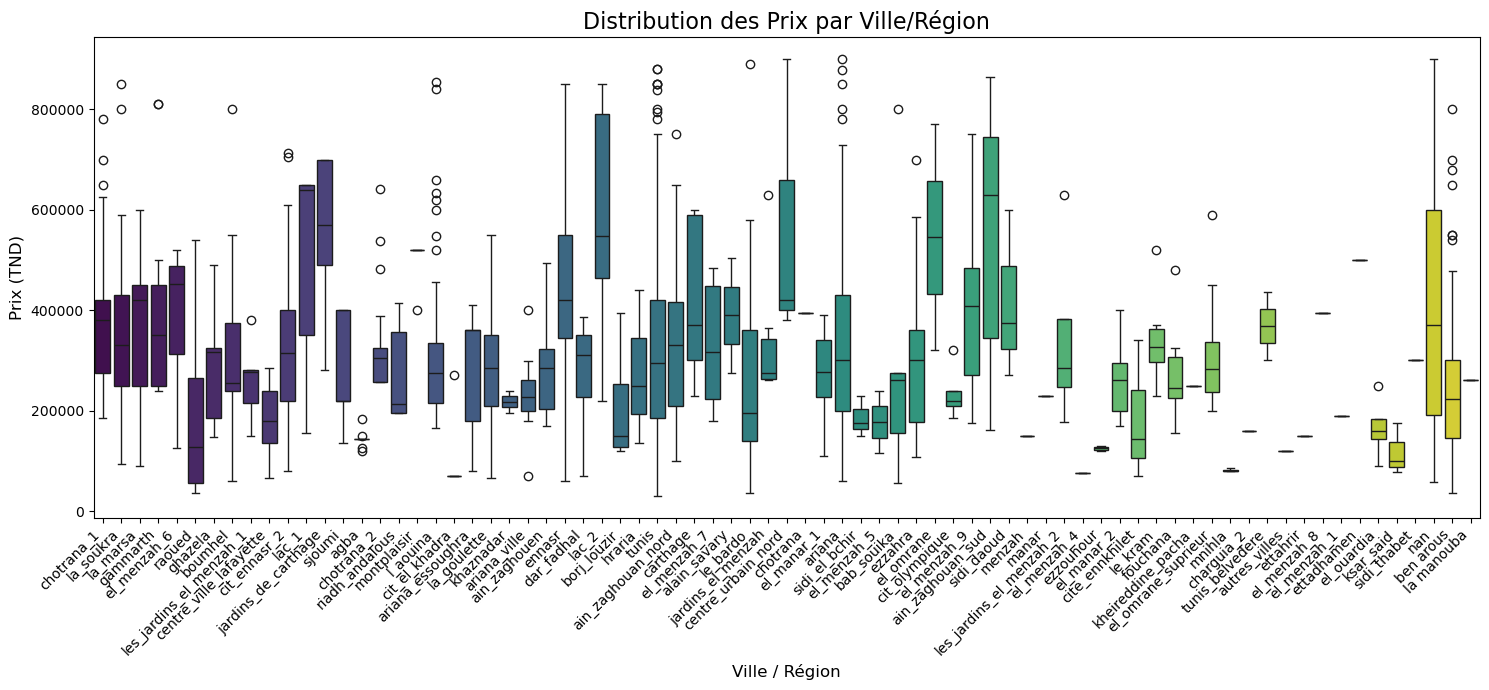

In [25]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    x='ville_region',
    y='prix',
    data=df_modele,
    palette='viridis'
)
plt.title('Distribution des Prix par Ville/Région', fontsize=16)
plt.xlabel('Ville / Région', fontsize=12)
plt.ylabel('Prix (TND)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\fatim\AppData\Local\Temp\ipykernel_27744\2861858540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


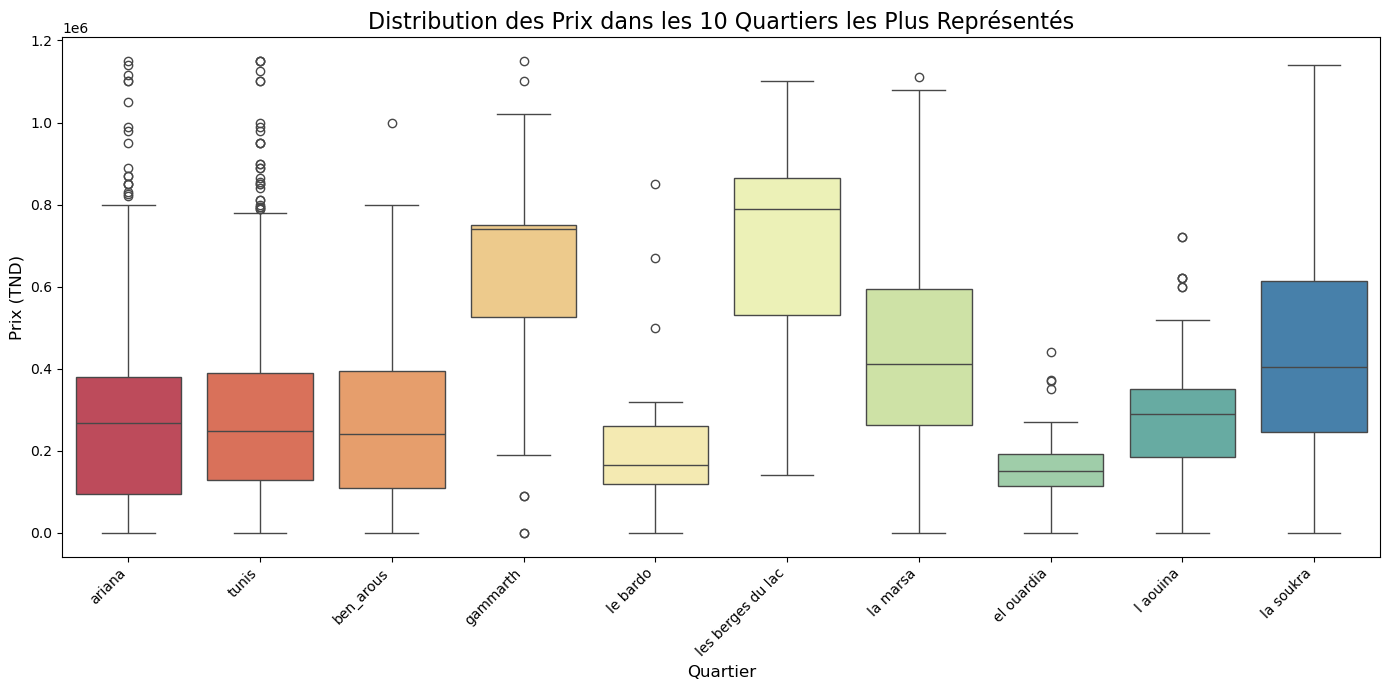

In [17]:
# 1. Identifier les 10 quartiers les plus fréquents
top_10_quartiers = df_modele['quartier'].value_counts().nlargest(10).index
df_top_quartiers = df_modele[df_modele['quartier'].isin(top_10_quartiers)]

plt.figure(figsize=(14, 7))
sns.boxplot(
    x='quartier',
    y='prix',
    data=df_top_quartiers,
    palette='Spectral'
)
plt.title('Distribution des Prix dans les 10 Quartiers les Plus Représentés', fontsize=16)
plt.xlabel('Quartier', fontsize=12)
plt.ylabel('Prix (TND)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import pickle

COLONNE_PRIX = 'prix'
COLONNE_NB_PIECES = 'nb_pieces'
COLONNE_SUPERFICIE = 'superficie'
COLONNE_VILLE_REGION = 'ville_region'

df_temp = df_modele.copy()


df_temp[COLONNE_NB_PIECES] = pd.to_numeric(df_temp[COLONNE_NB_PIECES], errors='coerce')

# remplacer les valeurs manquants par le mode.
mode_pieces = df_temp[COLONNE_NB_PIECES].mode().iloc[0] if not df_temp[COLONNE_NB_PIECES].mode().empty else 1
df_temp[COLONNE_NB_PIECES] = df_temp[COLONNE_NB_PIECES].fillna(mode_pieces)

#création de la colonne cible log-transformée
df_temp['log_Prix'] = np.log1p(df_temp[COLONNE_PRIX])

# 3. Encodage One-Hot
data_encoded = pd.get_dummies(df_temp.drop(columns=['quartier'], errors='ignore'), 
                             columns=[COLONNE_VILLE_REGION], 
                             drop_first=True)

# DÉFINITION DE X et y
features_to_drop = [COLONNE_PRIX, 'log_Prix', COLONNE_VILLE_REGION]

# X contient toutes les colonnes numériques
X = data_encoded.drop(columns=features_to_drop, errors='ignore').select_dtypes(include=np.number)
y = data_encoded['log_Prix']

print("X et y sont définis et encodés.")
print(f"X contient {X.shape[0]} lignes et {X.shape[1]} caractéristiques.")

X et y sont définis et encodés.
X contient 1974 lignes et 2 caractéristiques.


In [28]:
# Standardisation des variables numériques
# Variables numériques continues à standardiser
numerical_cols = [COLONNE_SUPERFICIE, COLONNE_NB_PIECES]

# On vérifie si les colonnes sont bien dans X après l'encodage et les filtres
if all(col in X.columns for col in numerical_cols):
    scaler = StandardScaler()
    
    # Appliquer la transformation
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    # Sauvegardez le scaler pour le déploiement
    with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)
        
    print(f"Standardisation appliquée avec succès à {numerical_cols}.")
    print("Le 'scaler.pkl' a été sauvegardé.")
else:
    print(f"ATTENTION : Une des colonnes ({numerical_cols}) est manquante dans X. Standardisation ignorée.")
    

Standardisation appliquée avec succès à ['superficie', 'nb_pieces'].
Le 'scaler.pkl' a été sauvegardé.


In [29]:
from sklearn.model_selection import train_test_split

#Séparation des données (Train/Test Split)
print("Démarrage de la Séparation Train/Test")

# Séparation des données en 80% Entraînement et 20% Test
# random_state=42 assure que la séparation est la même à chaque exécution
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"X_train (Entraînement) : {X_train.shape}")
print(f"X_test (Test) : {X_test.shape}")
print(f"y_train (Entraînement) : {y_train.shape}")
print(f"y_test (Test) : {y_test.shape}")

print("\nPréparation avancée terminée. Les données sont prêtes pour l'entraînement du modèle.")

Démarrage de la Séparation Train/Test
X_train (Entraînement) : (1579, 2)
X_test (Test) : (395, 2)
y_train (Entraînement) : (1579,)
y_test (Test) : (395,)

Préparation avancée terminée. Les données sont prêtes pour l'entraînement du modèle.


In [32]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

HYPERPARAMS = {
    'n_estimators': 300,       
    'max_depth': 20,                
    'min_samples_split': 2,        
    'min_samples_leaf': 1,          
    'max_features': 'sqrt',         
    'random_state': 42,
    'n_jobs': -1      
}
for key, value in HYPERPARAMS.items():
    print(f"- {key}: {value}")


model = RandomForestRegressor(**HYPERPARAMS)
model.fit(X_train, y_train)
print("Modèle entraîné avec succès.")


y_pred_log = model.predict(X_test)
y_test_tnd = np.expm1(y_test)
y_pred_tnd = np.expm1(y_pred_log)

mae_tnd = mean_absolute_error(y_test_tnd, y_pred_tnd)
r2 = r2_score(y_test, y_pred_log)

print(f"R² Score : {r2:.4f} (Plus c'est proche de 1, mieux c'est)")
print(f"Erreur Moyenne (MAE) : {mae_tnd:,.0f} TND")

- n_estimators: 300
- max_depth: 20
- min_samples_split: 2
- min_samples_leaf: 1
- max_features: sqrt
- random_state: 42
- n_jobs: -1
Modèle entraîné avec succès.
R² Score : 0.4332 (Plus c'est proche de 1, mieux c'est)
Erreur Moyenne (MAE) : 90,899 TND


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("ÉVALUATION PONCTUELLE (Train/Test Split)")

# Créer et entraîner le modèle
gbr_simple = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr_simple.fit(X_train, y_train)
print("Modèle Gradient Boosting entraîné sur X_train.")

# Prédictions
y_pred_gbr = gbr_simple.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor (Test Set):")
print(f"MAE (log) : {mae:.4f}")
print(f"RMSE (log) : {rmse:.4f}")
print(f"R2 score : {r2:.4f}")

ÉVALUATION PONCTUELLE (Train/Test Split)
Modèle Gradient Boosting entraîné sur X_train.

Gradient Boosting Regressor (Test Set):
MAE (log) : 0.3108
RMSE (log) : 0.4127
R2 score : 0.4862


In [34]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

print("\n ÉVALUATION ROBUSTE (Validation Croisée K-Fold)")
gbr_cv = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("Début du calcul des scores sur 5 plis...")

# MAE en cross-validation

mae_scores = -cross_val_score(gbr_cv, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
print("\nScores MAE (log) par pli :")
print(mae_scores)
print(f"MAE CV moyen (log) : {mae_scores.mean():.4f}")

# R² en cross-validation
r2_scores = cross_val_score(gbr_cv, X, y, cv=kf, scoring='r2', n_jobs=-1)
print("\nScores R² par pli :")
print(r2_scores)
print(f"R² CV moyen : {r2_scores.mean():.4f}")


 ÉVALUATION ROBUSTE (Validation Croisée K-Fold)
Début du calcul des scores sur 5 plis...

Scores MAE (log) par pli :
[0.31078232 0.35180241 0.32236957 0.33106184 0.33785862]
MAE CV moyen (log) : 0.3308

Scores R² par pli :
[0.48623257 0.3946293  0.43614999 0.49059249 0.4154727 ]
R² CV moyen : 0.4446


--- Statistiques du Prix Réel (brut) dans l'Ensemble de Test ---
count       395.000000
mean     316706.012658
std      176500.403971
min       35000.000000
25%      185000.000000
50%      275000.000000
75%      400000.000000
max      880000.000000
Name: log_Prix, dtype: float64


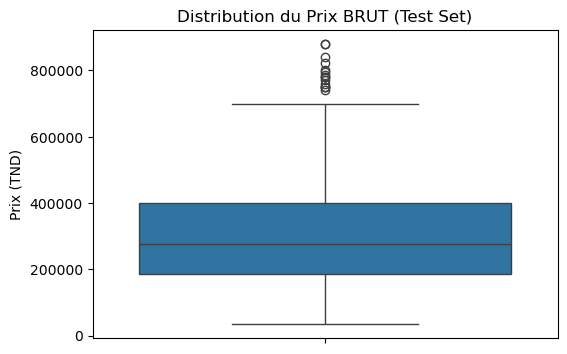

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# La fonction np.expm1 est l'inverse de np.log1p, elle permet de revenir au prix réel
# La variable y_test doit être définie (résultat de train_test_split)
y_test_prix_brut = np.expm1(y_test) 

print("--- Statistiques du Prix Réel (brut) dans l'Ensemble de Test ---")

# La sortie de 'describe()' est cruciale
stats_prix = y_test_prix_brut.describe()
print(stats_prix)

# Visualisation pour confirmer les outliers survivants
plt.figure(figsize=(6, 4))
sns.boxplot(y=y_test_prix_brut)
plt.title("Distribution du Prix BRUT (Test Set)")
plt.ylabel("Prix (TND)")
plt.show()

In [32]:
import joblib
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
# KFold settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []   # tableau final
models = {}    # dictionnaire pour sauvegarde


# Fonction utilitaire pour K-Fold

def evaluate_kfold(model, X, y):
    # Les scores sont sur l'échelle log, car y est le log_Prix
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1)
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1))
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2", n_jobs=-1)
    
    return mae_scores.mean(), rmse_scores.mean(), r2_scores.mean()

# 1) RANDOM FOREST
print("--- Démarrage de l'évaluation du Random Forest ---")
rf = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Train/Test
results.append({
    "Modèle": "RandomForest_Test",
    "MAE (log)": mean_absolute_error(y_test, y_pred),
    "RMSE (log)": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
})

# KFold
mae_k, rmse_k, r2_k = evaluate_kfold(rf, X, y)
results.append({
    "Modèle": "RandomForest_KFold",
    "MAE (log)": mae_k,
    "RMSE (log)": rmse_k,
    "R2": r2_k
})
models["RandomForest"] = rf

# 2) GRADIENT BOOSTING

print("--- Démarrage de l'évaluation du Gradient Boosting ---")
gbr = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Train/Test
results.append({
    "Modèle": "GradientBoosting_Test",
    "MAE (log)": mean_absolute_error(y_test, y_pred),
    "RMSE (log)": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
})

# KFold
mae_k, rmse_k, r2_k = evaluate_kfold(gbr, X, y)
results.append({
    "Modèle": "GradientBoosting_KFold",
    "MAE (log)": mae_k,
    "RMSE (log)": rmse_k,
    "R2": r2_k
})
models["GradientBoosting"] = gbr


# 3) RIDGE REGRESSION
print("--- Démarrage de l'évaluation de la Ridge Regression ---")
ridge = Ridge(alpha=1.0, random_state=42) # Ridge est sensible à la standardisation, qui a été appliquée à X.
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Train/Test
results.append({
    "Modèle": "Ridge_Test",
    "MAE (log)": mean_absolute_error(y_test, y_pred),
    "RMSE (log)": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
})

# KFold
mae_k, rmse_k, r2_k = evaluate_kfold(ridge, X, y)
results.append({
    "Modèle": "Ridge_KFold",
    "MAE (log)": mae_k,
    "RMSE (log)": rmse_k,
    "R2": r2_k
})
models["Ridge"] = ridge


# ------------------------------
# 4) Tableau final des résultats
# ------------------------------
df_results = pd.DataFrame(results)
# Le meilleur modèle est celui qui minimise la MAE
df_results_sorted = df_results.sort_values("MAE (log)")

print("\n===== Tableau comparatif complet (Métriques sur échelle log) =====\n")
print(df_results_sorted)

# ------------------------------
# 5) Sauvegarde du meilleur modèle
# ------------------------------
best_model_name = df_results_sorted.iloc[0]["Modèle"]
model_key = best_model_name.split("_")[0]  # ex: "RandomForest"
best_model = models[model_key]

joblib.dump(best_model, "best_model.pkl")

print(f"\n🎉 Meilleur modèle sauvegardé : {best_model_name} → best_model.pkl")

--- Démarrage de l'évaluation du Random Forest ---
--- Démarrage de l'évaluation du Gradient Boosting ---
--- Démarrage de l'évaluation de la Ridge Regression ---

===== Tableau comparatif complet (Métriques sur échelle log) =====

                   Modèle  MAE (log)  RMSE (log)        R2
0       RandomForest_Test   0.309743    0.433817  0.454502
2   GradientBoosting_Test   0.316941    0.433423  0.455494
1      RandomForest_KFold   0.325589    0.447772  0.414765
3  GradientBoosting_KFold   0.328997    0.444501  0.423325
4              Ridge_Test   0.345434    0.481238  0.328728
5             Ridge_KFold   0.352602    0.473064  0.346971

🎉 Meilleur modèle sauvegardé : RandomForest_Test → best_model.pkl


In [38]:
import xgboost as xg
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

xgb_final = xg.XGBRegressor(
    n_estimators=1000,       
    learning_rate=0.01,      
    max_depth=8,             
    min_child_weight=3,      
    subsample=0.7,           
    colsample_bytree=0.7,    
    reg_lambda=1.5,          
    reg_alpha=0.5,           
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)

print("Démarrage de l'optimisation finale")
xgb_final.fit(X_train, y_train)

# --- Évaluation ---
y_pred_log = xgb_final.predict(X_test)
r2 = r2_score(y_test, y_pred_log)

# Conversion TND
y_test_tnd = np.expm1(y_test)
y_pred_tnd = np.expm1(y_pred_log)
mae_tnd = mean_absolute_error(y_test_tnd, y_pred_tnd)

print(f"\nNouveaux Résultats (XGBoost:")
print(f"R² Score : {r2:.4f}")

Démarrage de l'optimisation finale

Nouveaux Résultats (XGBoost:
R² Score : 0.4495


In [39]:
!pip install streamlit

In [40]:
import os
print(f"Les fichiers .pkl ont été créés dans le dossier : {os.getcwd()}")

Les fichiers .pkl ont été créés dans le dossier : C:\Users\fatim


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

dossier = r'C:\Users\fatim\Desktop\Projet_ML_Final'
if not os.path.exists(dossier): 
    os.makedirs(dossier)

df_modele.columns = df_modele.columns.str.lower()

data_encoded = pd.get_dummies(df_modele.drop(columns=['quartier'], errors='ignore'), 
                             columns=['ville_region'], drop_first=True)

X = data_encoded.drop(columns=['prix', 'log_prix'], errors='ignore').select_dtypes(include=np.number)
y = np.log1p(df_modele['prix'])

scaler = StandardScaler()
X[['superficie', 'nb_pieces']] = scaler.fit_transform(X[['superficie', 'nb_pieces']])
joblib.dump(scaler, os.path.join(dossier, 'scaler.pkl'))

model_final = RandomForestRegressor(n_estimators=100, random_state=42)
model_final.fit(X, y)
joblib.dump(model_final, os.path.join(dossier, 'modele_final_prediction_prix.pkl'))

print("-" * 30)
print("VÉRIFICATION DES FICHIERS :")
print(f"1. Scaler : {os.path.exists(os.path.join(dossier, 'scaler.pkl'))}")
print(f"2. Modèle : {os.path.exists(os.path.join(dossier, 'modele_final_prediction_prix.pkl'))}")
print(f"3. Taille modèle : {os.path.getsize(os.path.join(dossier, 'modele_final_prediction_prix.pkl')) / 1024:.2f} Ko")
print("-" * 30)

------------------------------
VÉRIFICATION DES FICHIERS :
1. Scaler : True
2. Modèle : True
3. Taille modèle : 6256.67 Ko
------------------------------


In [1]:
%%writefile C:\Users\fatim\Desktop\Projet_ML_Final\app_prediction.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

# CONFIGURATION DES CHEMINS
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
MODEL_PATH = os.path.join(BASE_DIR, 'modele_final_prediction_prix.pkl')
SCALER_PATH = os.path.join(BASE_DIR, 'scaler.pkl')

st.set_page_config(page_title="ImmoTunis - Grand Tunis", page_icon="🏡", layout="centered")

# CHARGEMENT DES FICHIERS
@st.cache_resource
def load_assets():
    # Charge le modèle et le scaler
    m = joblib.load(MODEL_PATH)
    s = joblib.load(SCALER_PATH)
    return m, s

try:
    model, scaler = load_assets()
    all_features = model.feature_names_in_
except Exception as e:
    st.error(f"Erreur de chargement : {e}")
    st.info("Assurez-vous que les fichiers .pkl sont dans le même dossier que ce script.")
    st.stop()

# --- VOTRE LISTE COMPLÈTE DU GRAND TUNIS ---
GRAND_TUNIS_LISTE = sorted([
    'Tunis', 'Lafayette', 'Mutuelleville', 'Montplaisir', 'Centre Urbain Nord',
    'El Menzah', 'El Menzah 1', 'El Menzah 5', 'El Menzah 6', 'Ennasr', 
    'El Omrane', 'El Omrane Supérieur', 'El Ouardia', 'El Khadra', 
    'Bab Souika', 'Bab Bhar', 'La Kasbah', 'La Medina',
    'Sijoumi', 'Séjoumi', 'Cité Olympique', 'Cité Jardins', 'Bardo', 'Le Bardo',
    'Ariana', 'Ariana Ville', 'Ariana Superieur', 'Ghazela', 'Cite Ghazela',
    'Raoued', 'Raoued Plage', 'Borj Louzir', 'La Soukra', 'Sokra',
    'Chotrana 1', 'Chotrana 2', 'Chotrana 3', 'Ennkhilet',
    'La Marsa', 'Marsa', 'Sidi Daoud', 'Gammarth', 'Gammarth Supérieur',
    'Gammarth Village', 'Cité des Pins', 'Sidi Bou Said',
    'Carthage', 'Carthage Byrsa', 'Carthage Salambo',
    'Le Kram', 'Krame', 'Lac 1', 'Lac 2', 'Les Berges du Lac', 'Jardins de Carthage',
    'Ben Arous', 'Mourouj 1','Mourouj 2','Mourouj 3','Mourouj 4','Mourouj 5','Mourouj 6',
    'Megrine', 'Megrine Jawhara', 'Megrine Chaker', 
    'Rades', 'Rades Plage', 'Ezzahra', 'Boumhel', 'Fouchana', 
    'Hammam Lif', 'Hammam Chatt', 'Medina El Jadida',
    'Manouba', 'Oued Ellil', 'Den Den', 'Mornaguia', 'Douar Hicher'
])

#INTERFACE UTILISATEUR
st.title("🏡 Estimateur Immobilier Grand Tunis")
st.write("Entrez les caractéristiques pour obtenir une estimation du prix de vente.")

with st.container():
    col1, col2 = st.columns(2)
    
    with col1:
        superficie = st.number_input("Superficie habitable (m²)", min_value=20, max_value=800, value=120)
        nb_pieces = st.slider("Nombre de pièces", 1, 10, 3)
        
    with col2:
        ville_selected = st.selectbox("Localisation (Ville/Région)", GRAND_TUNIS_LISTE)

st.markdown("---")

# CALCUL DE LA PRÉDICTION 
if st.button("💰 Calculer l'estimation", use_container_width=True):
    if ville_selected:
        # 1. Créer un DataFrame vide avec les colonnes du modèle
        input_df = pd.DataFrame(0.0, index=[0], columns=all_features)
        
        # 2. Remplir les valeurs numériques
        input_df['superficie'] = superficie
        input_df['nb_pieces'] = nb_pieces
        
        # 3. Appliquer le Scaler (Standardisation)
        input_df[['superficie', 'nb_pieces']] = scaler.transform(input_df[['superficie', 'nb_pieces']])
        
        # 4. Encodage de la ville
        col_ville = f"ville_region_{ville_selected.lower()}"
        
        if col_ville in all_features:
            input_df[col_ville] = 1.0
        
        # 5. Prédiction
        log_pred = model.predict(input_df)
        prix_final = np.expm1(log_pred)[0]
        
        # Affichage du résultat 
        st.balloons()
        st.success("### Estimation Terminée")
        st.metric(label="Prix de Vente Estimé", value=f"{prix_final:,.0f} TND")
        
        st.info(f"Localisation prise en compte : {ville_selected}")
    else:
        st.error("Veuillez sélectionner une ville dans la liste.")

Overwriting C:\Users\fatim\Desktop\Projet_ML_Final\app_prediction.py


In [ ]:
# Exécutez cette cellule pour lancer l'app sans ouvrir le CMD
!streamlit run C:\Users\fatim\Desktop\Projet_ML_Final\app_prediction.py